In [12]:
# Initialize system

from credit_decision_system.credit_decision_system import CreditDecisionSystem

system = CreditDecisionSystem(use_llm=True, NLP_AVAILABLE=True)

✅ ContextualRAG initialized with CAG


In [13]:
# Load data
system.load_data()

In [14]:
# Train models (optional for comparison)
system.train_models()

Training standard models...
Training logistic_regression...
Training calibrated_logistic_regression...


c:\CS3263\credit-decision-system-cs3263\cs3263env\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\CS3263\credit-decision-system-cs3263\cs3263env\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\CS3263\credit-decision-system-cs3263\cs3263env\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\CS3263\credit-decision-system-cs3263\cs3263env\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: 

Training xgboost...
Training random_forest...
✅ All models trained successfully


c:\CS3263\credit-decision-system-cs3263\cs3263env\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\CS3263\credit-decision-system-cs3263\cs3263env\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:50:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\CS3263\credit-decision-system-cs3263\cs3263env\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [15]:
# Train debaising model to compare to base models (optional)
system.train_adversarial_debiasing()


🛡️ Training Adversarial Debiasing Model...
Epoch 01 | Task Loss: 0.8220 | Adv Loss: 0.6827
Epoch 02 | Task Loss: 0.5594 | Adv Loss: 0.5999
Epoch 03 | Task Loss: 0.7556 | Adv Loss: 0.5252
Epoch 04 | Task Loss: 0.6182 | Adv Loss: 0.4329
Epoch 05 | Task Loss: 0.4690 | Adv Loss: 0.4235
Epoch 06 | Task Loss: 0.5199 | Adv Loss: 0.4389
Epoch 07 | Task Loss: 0.5811 | Adv Loss: 0.4680
Epoch 08 | Task Loss: 0.6581 | Adv Loss: 0.4863
Epoch 09 | Task Loss: 0.7406 | Adv Loss: 0.4348
Epoch 10 | Task Loss: 0.6021 | Adv Loss: 0.3960
Epoch 11 | Task Loss: 0.6438 | Adv Loss: 0.3550
Epoch 12 | Task Loss: 0.6457 | Adv Loss: 0.3233
Epoch 13 | Task Loss: 0.5865 | Adv Loss: 0.2868
Epoch 14 | Task Loss: 0.6401 | Adv Loss: 0.2528
Epoch 15 | Task Loss: 0.5739 | Adv Loss: 0.2219
Epoch 16 | Task Loss: 0.6349 | Adv Loss: 0.1942
Epoch 17 | Task Loss: 0.5601 | Adv Loss: 0.1683
Epoch 18 | Task Loss: 0.6305 | Adv Loss: 0.1479
Epoch 19 | Task Loss: 0.7050 | Adv Loss: 0.1301
Epoch 20 | Task Loss: 0.6272 | Adv Loss: 0.1

In [16]:
# Tune models (trains and replaces models with best-tuned ones)
system.tune_models()


🎯 Tuning all models using RandomizedSearchCV + GridSearchCV

🔍 Randomized Search for logistic_regression
Fitting 5 folds for each of 15 candidates, totalling 75 fits
➡️ Best random params: {'classifier__solver': 'liblinear', 'classifier__C': np.float64(0.1)}

🎯 Grid Search for logistic_regression
Fitting 5 folds for each of 3 candidates, totalling 15 fits
✅ Best grid params: {'classifier__C': np.float64(0.05), 'classifier__solver': 'liblinear'}

🔍 Randomized Search for calibrated_logistic_regression
Fitting 5 folds for each of 15 candidates, totalling 75 fits
➡️ Best random params: {'classifier__estimator__solver': 'lbfgs', 'classifier__estimator__C': np.float64(0.11497569953977356)}

🎯 Grid Search for calibrated_logistic_regression
Fitting 5 folds for each of 3 candidates, totalling 15 fits
✅ Best grid params: {'classifier__estimator__C': np.float64(0.11497569953977356), 'classifier__estimator__solver': 'lbfgs'}

🔍 Randomized Search for xgboost
Fitting 5 folds for each of 15 candidat

c:\CS3263\credit-decision-system-cs3263\cs3263env\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:50:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


➡️ Best random params: {'classifier__subsample': np.float64(0.6), 'classifier__n_estimators': 300, 'classifier__max_depth': 5, 'classifier__learning_rate': np.float64(0.02526315789473684)}

🎯 Grid Search for xgboost
Fitting 5 folds for each of 81 candidates, totalling 405 fits


c:\CS3263\credit-decision-system-cs3263\cs3263env\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:50:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Best grid params: {'classifier__learning_rate': np.float64(0.03789473684210526), 'classifier__max_depth': 5, 'classifier__n_estimators': 150, 'classifier__subsample': np.float64(0.6)}

🔍 Randomized Search for random_forest
Fitting 5 folds for each of 15 candidates, totalling 75 fits
➡️ Best random params: {'classifier__n_estimators': 300, 'classifier__min_samples_split': 2, 'classifier__max_depth': 10}

🎯 Grid Search for random_forest
Fitting 5 folds for each of 18 candidates, totalling 90 fits
✅ Best grid params: {'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 300}


({'logistic_regression': Pipeline(steps=[('preprocess',
                   ColumnTransformer(transformers=[('num', StandardScaler(),
                                                    ['duration_months',
                                                     'credit_amount',
                                                     'installment_rate',
                                                     'present_residence', 'age',
                                                     'existing_credits',
                                                     'num_dependents']),
                                                   ('cat',
                                                    OneHotEncoder(handle_unknown='ignore'),
                                                    ['checking_account_status',
                                                     'credit_history', 'purpose',
                                                     'savings_account',
                                        

In [17]:
# Evaluate models
system.evaluate_models()


Evaluating models...

Evaluating logistic_regression...
Accuracy: 0.7300
Precision (Class 1): 0.5385
Recall (Class 1): 0.7000
F1 Score (Class 1): 0.6087
ROC AUC: 0.7781

Evaluating calibrated_logistic_regression...
Accuracy: 0.8000
Precision (Class 1): 0.7500
Recall (Class 1): 0.5000
F1 Score (Class 1): 0.6000
ROC AUC: 0.7817

Evaluating xgboost...
Accuracy: 0.7900
Precision (Class 1): 0.7143
Recall (Class 1): 0.5000
F1 Score (Class 1): 0.5882
ROC AUC: 0.7929

Evaluating random_forest...
Accuracy: 0.7900
Precision (Class 1): 0.6957
Recall (Class 1): 0.5333
F1 Score (Class 1): 0.6038
ROC AUC: 0.8005


{'logistic_regression': {'confusion_matrix': array([[52, 18],
         [ 9, 21]]),
  'classification_report': {'0': {'precision': 0.8524590163934426,
    'recall': 0.7428571428571429,
    'f1-score': 0.7938931297709924,
    'support': 70.0},
   '1': {'precision': 0.5384615384615384,
    'recall': 0.7,
    'f1-score': 0.6086956521739131,
    'support': 30.0},
   'accuracy': 0.73,
   'macro avg': {'precision': 0.6954602774274905,
    'recall': 0.7214285714285714,
    'f1-score': 0.7012943909724527,
    'support': 100.0},
   'weighted avg': {'precision': 0.7582597730138713,
    'recall': 0.73,
    'f1-score': 0.7383338864918686,
    'support': 100.0}},
  'roc_auc': np.float64(0.7780952380952381),
  'fpr': array([0.        , 0.        , 0.        , 0.01428571, 0.01428571,
         0.02857143, 0.02857143, 0.04285714, 0.04285714, 0.05714286,
         0.05714286, 0.07142857, 0.07142857, 0.08571429, 0.08571429,
         0.18571429, 0.18571429, 0.21428571, 0.21428571, 0.31428571,
         0.314


🔎 Interpreting model behavior...

📊 Top Predictors in Logistic Regression:
                                        feature  coefficient
    checking_account_status_no checking account    -0.710762
                 checking_account_status_< 0 DM     0.512929
credit_history_critical account / other credits    -0.459596
                             purpose_car (used)    -0.421028
                       savings_account_< 100 DM     0.334424
            employment_since_4 <= ... < 7 years    -0.328517
                              purpose_car (new)     0.314206
                        other_installments_none    -0.304179
                                duration_months     0.302374
                               installment_rate     0.288408
                      employment_since_< 1 year     0.263285
               personal_status_sex_male: single    -0.256070
                                  credit_amount     0.248658
                 property_unknown / no property     0.240349
         

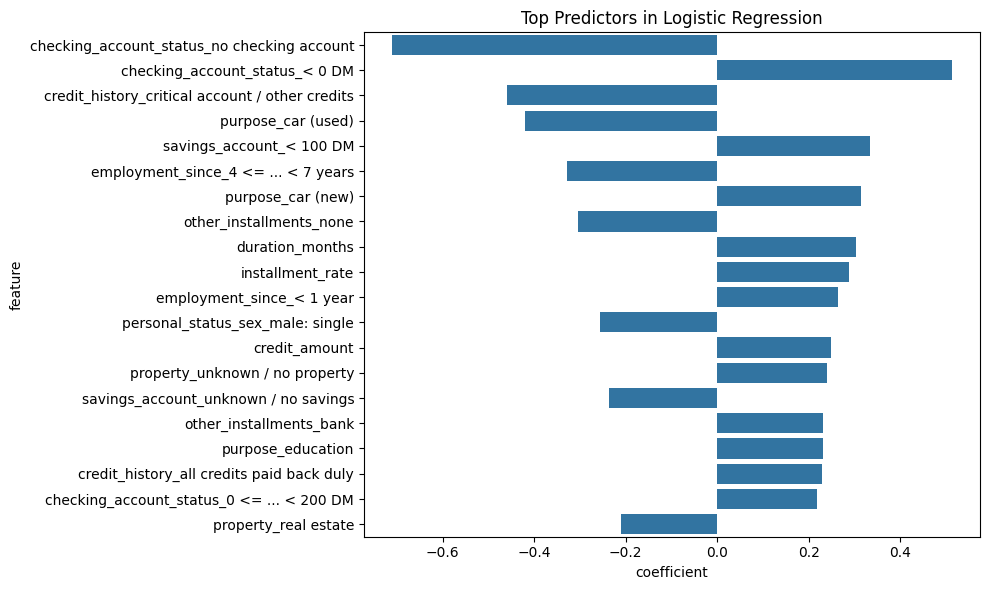

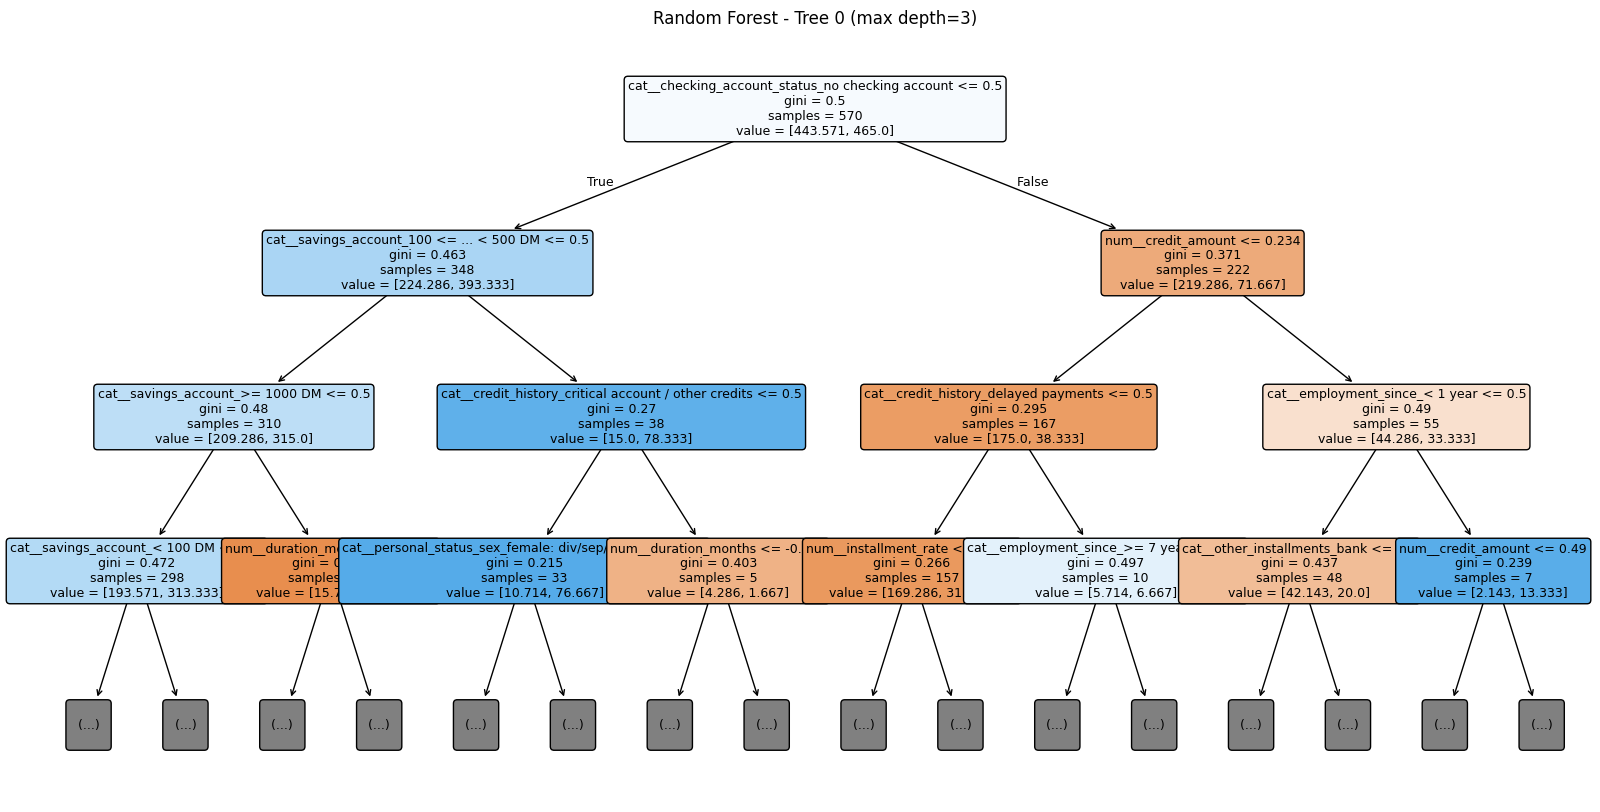

In [18]:
# Interpret models

system.explain_model_behaviors()


📊 Fairness Evaluation for Protected Attribute: personal_status_sex


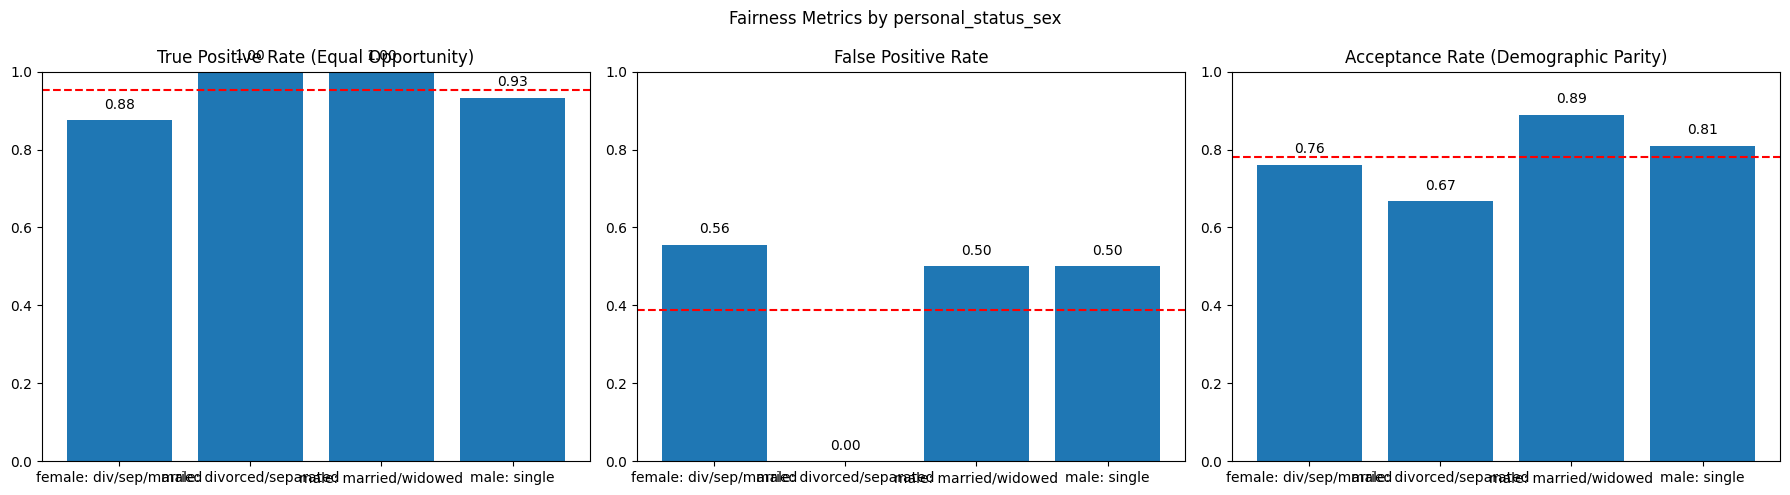


📌 True Positive Rate (Equal Opportunity)
 - female: div/sep/married: 0.875
 - male: single: 0.933
 - male: married/widowed: 1.000
 - male: divorced/separated: 1.000

📌 False Positive Rate
 - female: div/sep/married: 0.556
 - male: single: 0.500
 - male: married/widowed: 0.500
 - male: divorced/separated: 0.000

📌 Acceptance Rate (Demographic Parity)
 - female: div/sep/married: 0.760
 - male: single: 0.810
 - male: married/widowed: 0.889
 - male: divorced/separated: 0.667

📊 Fairness Evaluation for Protected Attribute: age_group


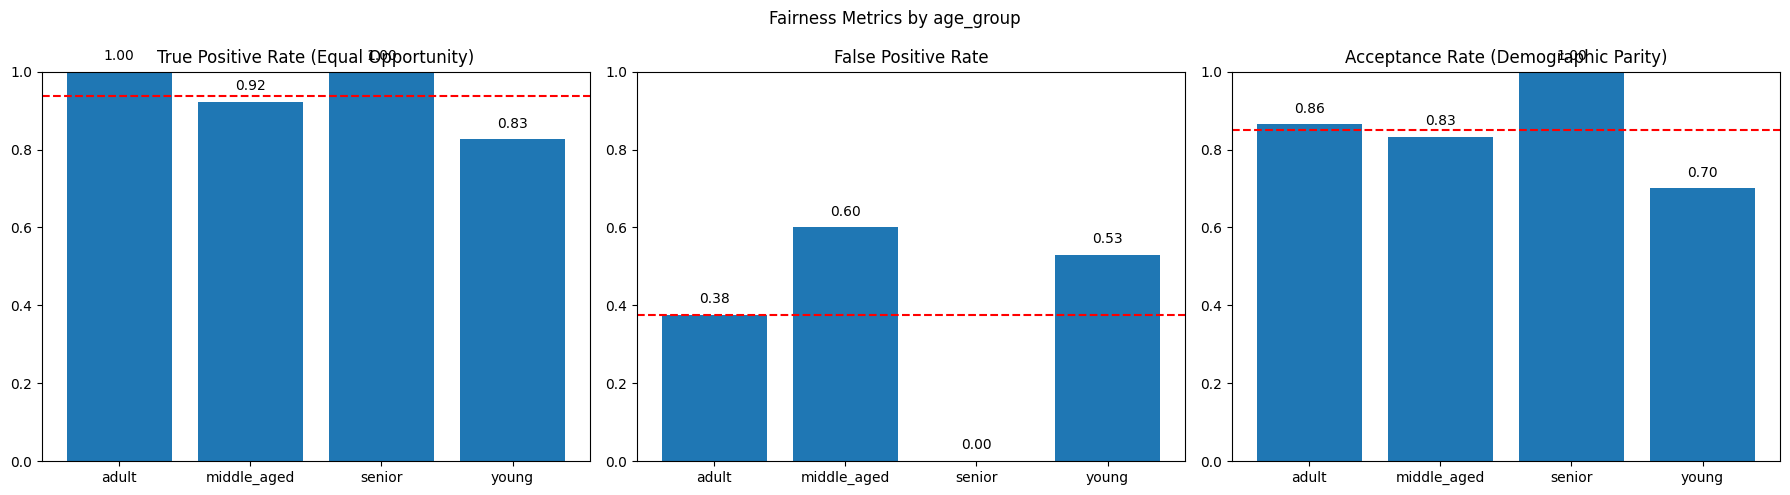


📌 True Positive Rate (Equal Opportunity)
 - middle_aged: 0.923
 - young: 0.826
 - adult: 1.000
 - senior: 1.000

📌 False Positive Rate
 - middle_aged: 0.600
 - young: 0.529
 - adult: 0.375
 - senior: 0.000

📌 Acceptance Rate (Demographic Parity)
 - middle_aged: 0.833
 - young: 0.700
 - adult: 0.865
 - senior: 1.000

📊 Fairness Evaluation for Protected Attribute: foreign_worker


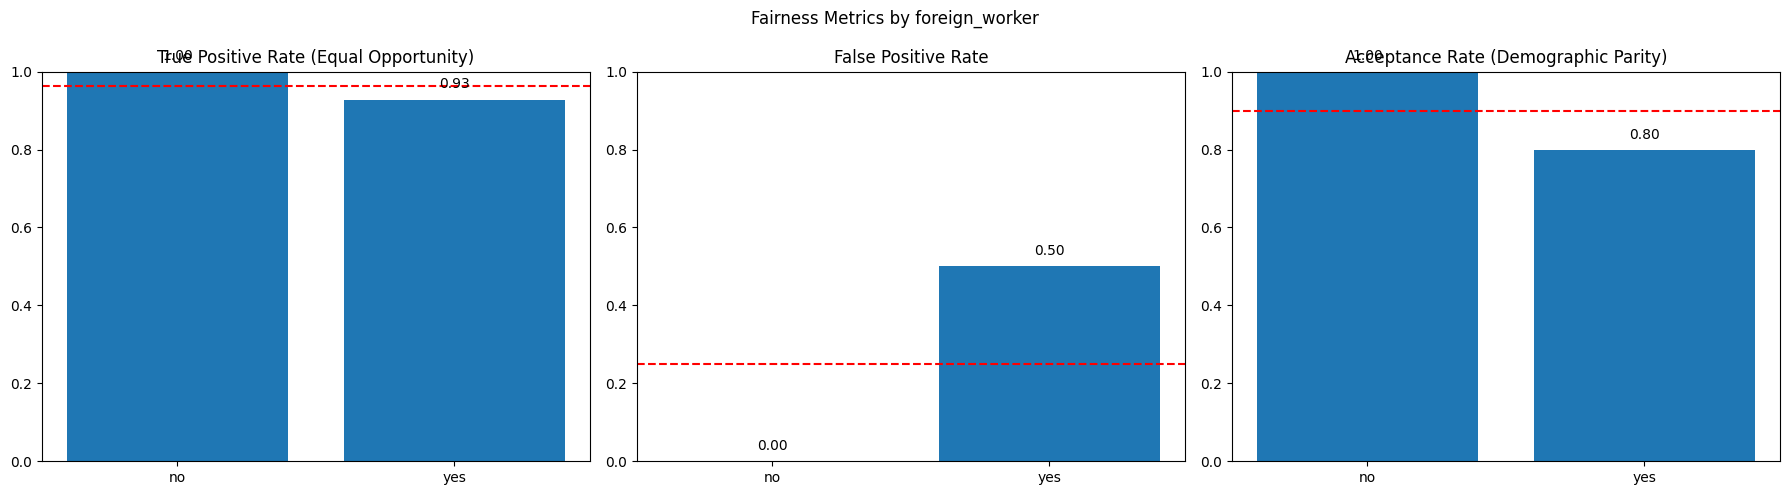


📌 True Positive Rate (Equal Opportunity)
 - yes: 0.928
 - no: 1.000

📌 False Positive Rate
 - yes: 0.500
 - no: 0.000

📌 Acceptance Rate (Demographic Parity)
 - yes: 0.798
 - no: 1.000


{'personal_status_sex': [([('female: div/sep/married', 0.875),
    ('male: single', 0.9333333333333333),
    ('male: married/widowed', 1.0),
    ('male: divorced/separated', 1.0)],
   'True Positive Rate (Equal Opportunity)',
   <Axes: title={'center': 'True Positive Rate (Equal Opportunity)'}>),
  ([('female: div/sep/married', 0.5555555555555556),
    ('male: single', 0.5),
    ('male: married/widowed', 0.5),
    ('male: divorced/separated', 0.0)],
   'False Positive Rate',
   <Axes: title={'center': 'False Positive Rate'}>),
  ([('female: div/sep/married', 0.76),
    ('male: single', 0.8095238095238095),
    ('male: married/widowed', 0.8888888888888888),
    ('male: divorced/separated', 0.6666666666666666)],
   'Acceptance Rate (Demographic Parity)',
   <Axes: title={'center': 'Acceptance Rate (Demographic Parity)'}>)],
 'age_group': [([('middle_aged', 0.9230769230769231),
    ('young', 0.8260869565217391),
    ('adult', 1.0),
    ('senior', 1.0)],
   'True Positive Rate (Equal Oppor

In [19]:
# Evaluate fairness

system.evaluate_fairness()


🔍 Starting joint tuning of Single Q and Double Q agents...

🎯 Testing α=0.2, γ=0.8, ε=0.2
 - Single Q Reward: -833526.33
 - Double Q Reward: -975782.33
🎯 Testing α=0.1, γ=0.95, ε=0.2
 - Single Q Reward: -906838.17
 - Double Q Reward: -965182.86
🎯 Testing α=0.1, γ=0.9, ε=0.1
 - Single Q Reward: -842086.97
 - Double Q Reward: -974441.31
🎯 Testing α=0.2, γ=0.9, ε=0.2
 - Single Q Reward: -1096937.49
 - Double Q Reward: -1143293.17
🎯 Testing α=0.05, γ=0.95, ε=0.3
 - Single Q Reward: -893195.99
 - Double Q Reward: -811506.01
🎯 Testing α=0.1, γ=0.8, ε=0.1
 - Single Q Reward: -881955.53
 - Double Q Reward: -773818.02
🎯 Testing α=0.2, γ=0.9, ε=0.1
 - Single Q Reward: -874296.04
 - Double Q Reward: -1058133.45
🎯 Testing α=0.05, γ=0.8, ε=0.1
 - Single Q Reward: -953612.70
 - Double Q Reward: -1021431.10
🎯 Testing α=0.2, γ=0.95, ε=0.3
 - Single Q Reward: -1086769.61
 - Double Q Reward: -952221.67
🎯 Testing α=0.1, γ=0.9, ε=0.2
 - Single Q Reward: -885528.17
 - Double Q Reward: -917761.93

🏁 Best H

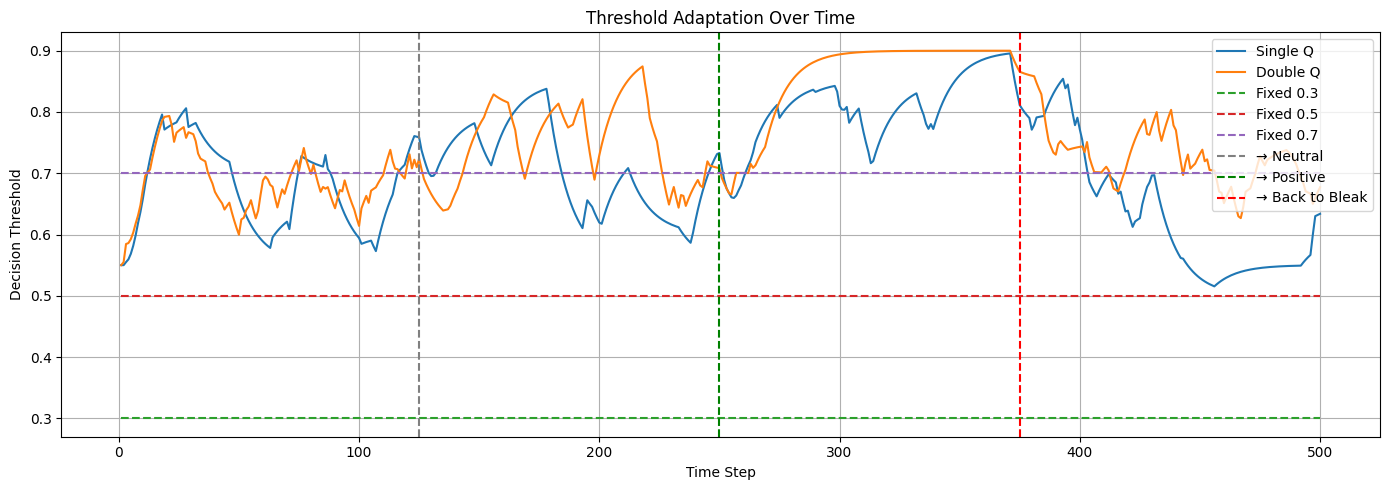

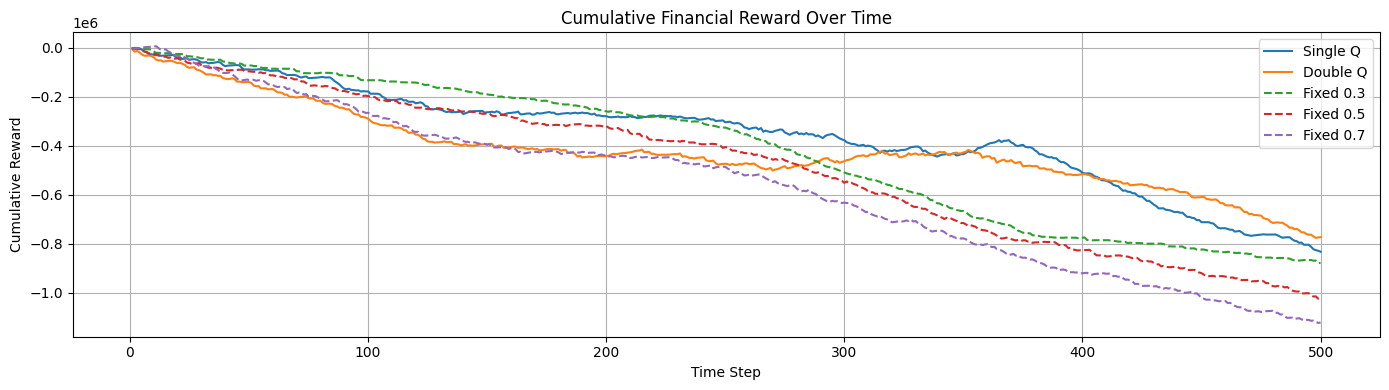

{'best_single_q': {'reward': np.float64(-833526.3266666674),
  'alpha': 0.2,
  'gamma': 0.8,
  'epsilon': 0.2,
  'result': {'label': 'Single Q',
   'thresholds': [0.55,
    0.55,
    0.555,
    0.5595000000000001,
    0.5685500000000001,
    0.5816950000000001,
    0.5985255,
    0.6186729500000001,
    0.6368056550000001,
    0.6581250895,
    0.68231258055,
    0.704081322495,
    0.7236731902455,
    0.74130587122095,
    0.757175284098855,
    0.7714577556889696,
    0.7843119801200726,
    0.7958807821080653,
    0.7712927038972589,
    0.7741634335075331,
    0.7767470901567799,
    0.779072381141102,
    0.7811651430269919,
    0.7830486287242928,
    0.7897437658518636,
    0.7957693892666772,
    0.8011924503400094,
    0.8060732053060085,
    0.7754658847754077,
    0.7779192962978669,
    0.7801273666680804,
    0.7821146300012725,
    0.7739031670011451,
    0.7665128503010306,
    0.7598615652709275,
    0.7538754087438347,
    0.7484878678694512,
    0.7436390810825061,
 

In [20]:
# Tune threshold using RL agent

system.tune_and_compare_agents_via_simulation(n_trials=10, total_steps=500)


Preparing RL agent with synthetic data...

Training RL agent for bleak context...
Training RL threshold optimizer for 'bleak' context...


100%|██████████| 500/500 [00:25<00:00, 19.89it/s]


✅ Training complete. Best threshold for 'bleak': 0.50
✅ Optimal threshold for bleak context: 0.50

Training RL agent for neutral context...
Training RL threshold optimizer for 'neutral' context...


100%|██████████| 500/500 [00:24<00:00, 20.30it/s]


✅ Training complete. Best threshold for 'neutral': 0.90
✅ Optimal threshold for neutral context: 0.90

Training RL agent for positive context...
Training RL threshold optimizer for 'positive' context...


100%|██████████| 500/500 [00:36<00:00, 13.65it/s]

✅ Training complete. Best threshold for 'positive': 0.90
✅ Optimal threshold for positive context: 0.90


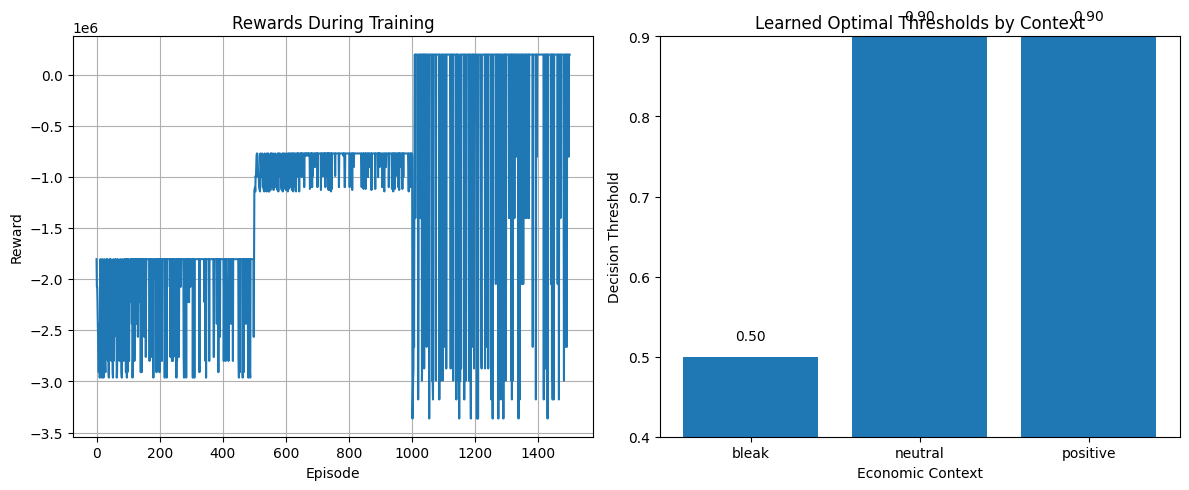

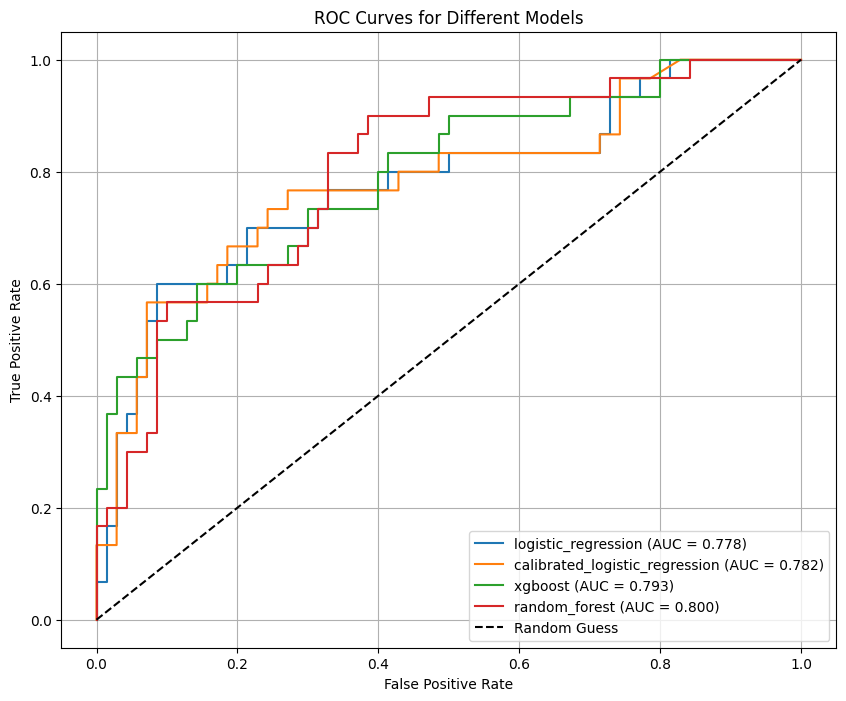

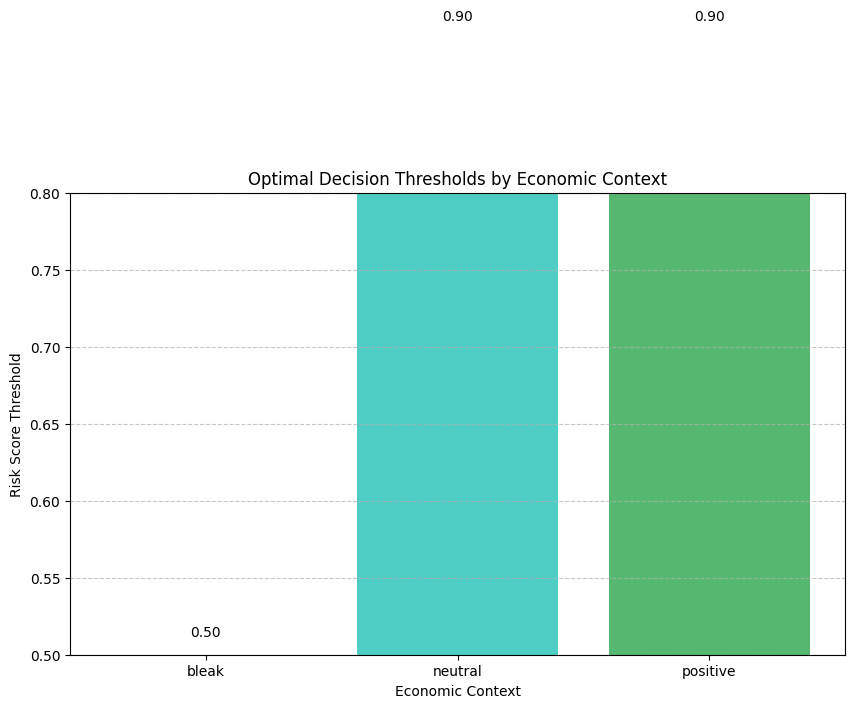

In [21]:
# Prepare RL agent

system.prepare_rl_agent()
system.visualize_model_performance()
system.visualize_context_thresholds()

In [22]:
# Demo with synthetic applicants

contexts = ["bleak", "neutral", "positive"]
for context in contexts:
    print(f"\n--- Test applicant in {context.upper()} economic context ---")
    
    # Generate synthetic applicant
    applicant_df = system.generator.generate_applicants(1, context)
    applicant = applicant_df.iloc[0]
    
    # Economic context query
    if context == "bleak":
        query = "Singapore's tech industry layoffs have increased by 30%, and venture capital funding is down 40% year-over-year."
    elif context == "neutral":
        query = "Singapore's tech industry shows mixed signals with hiring steady in established companies while startups report tighter funding."
    else:  # positive
        query = "Singapore's tech industry is booming with record investments and aggressive hiring across all sectors."
    
    # Make decision
    decision = system.make_decision(applicant, query)
    
    # Print key information
    print(f"Economic Context: {decision['economic_context']} (Reasoning: {decision['context_reasoning']})")
    print(f"Risk Score: {decision['risk_score']:.3f}, Threshold: {decision['threshold']:.3f}")
    print(f"Decision: {decision['decision']}")
    print(f"Explanation: {decision['explanation']}")


--- Test applicant in BLEAK economic context ---
Economic Context: bleak (Reasoning: Based on negative economic indicators in query)
Risk Score: 0.502, Threshold: 0.500
Decision: REJECTED
Explanation: {'explanation': "Your application has been declined. During the current economic downturn, we've adjusted our lending criteria to be more conservative. Your risk score of 0.50 was slightly above our current threshold of 0.50. We encourage you to strengthen your credit profile and reapply in the future. Consider improving your credit score or providing additional collateral.", 'metrics': ExplanationMetrics(generation_time=0.0, explanation_length=359, confidence_score=1.0, feature_importance=None)}

--- Test applicant in NEUTRAL economic context ---
Economic Context: neutral (Reasoning: No strong indicators in either direction)
Risk Score: 0.586, Threshold: 0.900
Decision: APPROVED
Explanation: {'explanation': "Your application has been approved! Based on current economic conditions, we're